In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('P780.tenv3', sep=' ', skipinitialspace=True, index_col=0)
df

,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),_north(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
site,,,,,,,,,,,,,,,,,,,,,
P780,08MAY27,2008.4025,54613,1481,2,-66.6,2208,0.770329,1999285,0.828290,...,0.0083,0.001724,0.001267,0.006427,-0.104430,0.222023,-0.212698,18.075026,-66.579135,154.06491
P780,08MAY28,2008.4052,54614,1481,3,-66.6,2208,0.771100,1999285,0.828728,...,0.0083,0.000901,0.000730,0.003357,-0.115969,0.068757,-0.117577,18.075026,-66.579135,154.07215
P780,08MAY29,2008.4079,54615,1481,4,-66.6,2208,0.773330,1999285,0.829775,...,0.0083,0.000883,0.000722,0.003321,-0.079310,0.135194,-0.105965,18.075026,-66.579135,154.07643
P780,08MAY30,2008.4107,54616,1481,5,-66.6,2208,0.771673,1999285,0.826960,...,0.0083,0.000883,0.000708,0.003274,-0.069646,0.073039,-0.148988,18.075026,-66.579135,154.08103
P780,08MAY31,2008.4134,54617,1481,6,-66.6,2208,0.769366,1999285,0.827072,...,0.0083,0.000879,0.000705,0.003236,-0.083593,0.101320,-0.105484,18.075026,-66.579135,154.08118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P780,23FEB21,2023.1403,59996,2250,2,-66.6,2208,0.866299,1999285,1.012989,...,0.0083,0.000807,0.000704,0.003312,-0.089855,0.093046,-0.128929,18.075027,-66.579134,154.06035
P780,23FEB22,2023.1431,59997,2250,3,-66.6,2208,0.868251,1999285,1.011587,...,0.0083,0.000822,0.000705,0.003264,-0.107990,0.107456,-0.091247,18.075027,-66.579134,154.06364
P780,23FEB23,2023.1458,59998,2250,4,-66.6,2208,0.870266,1999285,1.010502,...,0.0083,0.000831,0.000729,0.003411,-0.080831,0.104894,-0.102193,18.075027,-66.579134,154.06293


In [67]:
time  = np.array(df["yyyy.yyyy"])
east  = np.array(df["__east(m)"])
north = np.array(df["_north(m)"])
up    = np.array(df["____up(m)"])

# transpose matrix for processing
time  = np.array([time]).T
east  = np.array([east]).T
north = np.array([north]).T
up    = np.array([up]).T
n = len(time)

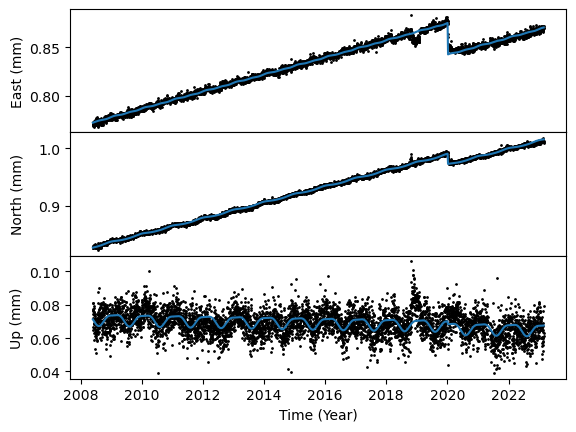

In [68]:
def hfunc(t):
    if t < 2020.0164:
        return 0.
    if t > 2020.0164:
        return 1.
    else:
        return 0.5
hfunc = np.vectorize(hfunc)
o = np.pi*2
A = np.concatenate((np.ones((n,1)), time, np.sin(time*o), np.cos(time*o), np.sin(2*o*time), np.cos(2*o*time), hfunc(time)), axis=1)
N = np.matmul(A.T, A)

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(time, east , "ko", markersize=1);
ax[0].set_ylabel("East (mm)")
ax[1].plot(time, north, "ko", markersize=1);
ax[1].set_ylabel("North (mm)")
ax[2].plot(time, up   , "ko", markersize=1)
ax[2].set_ylabel("Up (mm)"); ax[2].set_xlabel("Time (Year)")
fig.subplots_adjust(hspace=.0); fig.align_labels(ax[:])

# east
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, east)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[0].plot(x,y)

# north
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, north)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[1].plot(x,y)

# north
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, up)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[2].plot(x,y)

